In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import sklearn 

### 선형회귀 실습

1. 임의 데이터 생성

In [3]:
heights = [187, 174, 179, 192, 188, 160, 179, 168, 168, 174]
weights = [87, 81, 82, 92, 90, 61, 86, 66, 69, 69]

body_df = pd.DataFrame({'height':heights, 'weight':weights})
body_df.head(3)

,height,weight
0,187,87
1,174,81
2,179,82


2. 데이터 시각화: 산점도

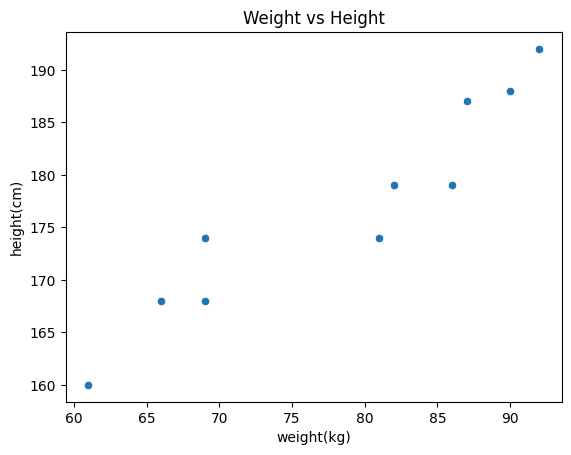

In [4]:
sns.scatterplot(data=body_df, x='weight', y='height')
plt.title('Weight vs Height')
plt.xlabel('weight(kg)')
plt.ylabel('height(cm)')
plt.show()

3. 선형회귀 훈련(적합)

In [5]:
from sklearn.linear_model import LinearRegression

#선형 모델을 가져와 변수에 저장
model_lr = LinearRegression()

# 타입 확인해보기
type(model_lr)

sklearn.linear_model._base.LinearRegression

In [6]:
# DataFrame[] : Series(데이터 프레임의 컬럼)
# DataFrame[[]] : DataFrame 그대로

x = body_df[['weight']]
y = body_df[['height']]

In [7]:
# 데이터 훈련
model_lr.fit(X = x, y = y)

LinearRegression()

In [8]:
# 가중치(w1) 확인, 변수에 지정
print(model_lr.coef_)
w1 = model_lr.coef_[0][0]

# 편향(bias, w0) 확인
print(model_lr.intercept_)
w0 = model_lr.intercept_[0]

[[0.86251245]]
[109.36527488]


In [9]:
print('y = {}x + {}'.format(w1.round(2), w0.round(2)))

y = 0.86x + 109.37


결론: 키(height, y)는 몸무게(weight, x)에 0.86을 곱한 뒤 109.37을 더하면 된다.

4. 위 함수식을 활용하여 예측 컬럼 추가

In [12]:
body_df['pred'] = body_df['weight']*w1 + w0
body_df.head(3)

,height,weight,pred
0,187,87,184.403858
1,174,81,179.228784
2,179,82,180.091296


5. 에러 계산 후 제곱

In [23]:
body_df['error'] = body_df['height'] - body_df['pred']
body_df['error^2'] = body_df['error']*body_df['error']

body_df.head(3)

,height,weight,pred,error,error^2
0,187,87,184.403858,2.596142,6.739951
1,174,81,179.228784,-5.228784,27.340178
2,179,82,180.091296,-1.091296,1.190927


6. MSE 계산 (전부 더하기)

In [17]:
body_df['error^2'].sum() / len(body_df)

10.152939045376309

7. 그래프 (산점도)

<Axes: xlabel='weight', ylabel='height'>

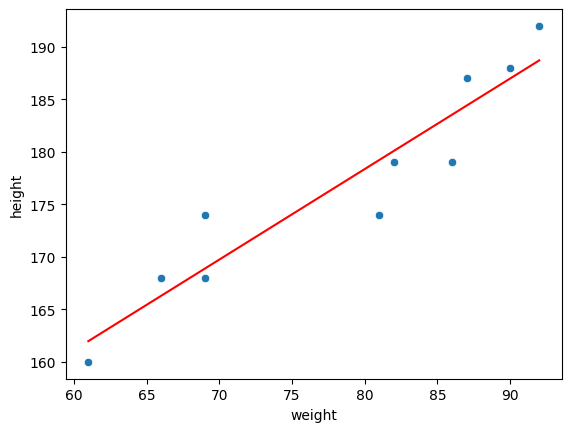

In [21]:
sns.scatterplot(data = body_df, x ='weight', y = 'height')
sns.lineplot(data = body_df, x = 'weight', y = 'pred', color = 'red')

8. 모델 평가

In [25]:
from sklearn.metrics import mean_squared_error, r2_score

In [31]:
# 평가함수는 공통적으로 정답(실제 true), 예측값(pred)

y_true = body_df['height']
y_pred = body_df['pred']

mean_squared_error(y_true, y_pred)

10.152939045376309

In [30]:
r2_score(y_true, y_pred)

0.8899887415172141

In [34]:
y_pred2 = model_lr.predict(body_df[['weight']])
y_pred2

array([[184.40385835],
       [179.22878362],
       [180.09129608],
       [188.71642061],
       [186.99139571],
       [161.97853455],
       [183.54134589],
       [166.29109682],
       [168.87863418],
       [168.87863418]])

In [35]:
mean_squared_error(y_true, y_pred2)

10.152939045376309